In [27]:
import sklearn.linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
data = pd.read_csv('Heart.csv', delimiter=';')
data = data.replace({'?': np.nan}).dropna().astype(float)
disease=data['num']
x=data[['age',  'sex',  'cp',  'trestbps',  'chol',  'fbs',  'restecg',  'thalach',  'exang',  'oldpeak', 'slope', 'ca', 'thal' ]]
#disease=disease.ravel()
disease = disease.replace(to_replace = [1.,2.,3.,4.], value=1.)

import scipy.stats
num_trees=299
errors=np.zeros(num_trees)
single_error=0.0
x_train, x_test, disease_train, disease_test = sklearn.model_selection.train_test_split(x, disease, test_size=0.5)
for b in range(1,num_trees):
    predictions=np.zeros((int((disease.size+1)/2),b))
    predicted_disease=np.zeros(disease_validation.size)
    for i in range(0,b):
        x_subtrain, x_subvalidation, disease_subtrain, disease_subvalidation = sklearn.model_selection.train_test_split(x_train, disease_train, test_size=0.5)
        clf=DecisionTreeClassifier()
        clf.fit(x_subtrain, disease_subtrain)
        disease_predict=clf.predict(x_validation)
        predictions[:,i]=disease_predict
    for row in range(0,predictions[:,0].size):
        a=predictions[row,:].astype(int)
        maxim= scipy.stats.mode(a)[0][0]
        predicted_disease[row]=maxim
    dif=disease_validation-predicted_disease
    ers=dif[dif!=0].size
    errors[b-1]=ers/disease_validation.size

plt.plot(errors)   
    

In [11]:
x_train, x_test, disease_train, disease_test = sklearn.model_selection.train_test_split(x, disease, test_size=0.5)
errorbc = []
errorrfc = []
oob_er_bc=[]
oob_er_rfc=[]
ind=np.linspace(1,300,100).astype(int)
for i in ind:
    bc = BaggingClassifier(n_estimators = i, oob_score=True)
    bc.fit(x_train, disease_train)
    disease_predict1 = bc.predict(x_test)
    test1 = (disease_test == disease_predict1)
    errorbc.append(len(test1[test1==False])/len(disease_test))
    oob_er_bc.append(1-bc.oob_score_)
    
    rfc = RandomForestClassifier(n_estimators = i, oob_score=True)
    rfc.fit(x_train, disease_train)
    disease_predict2 = rfc.predict(x_test)
    test2 = (disease_test == disease_predict2)
    errorrfc.append(len(test2[test2==False])/len(disease_test))
    oob_er_rfc.append(1-rfc.oob_score_)

C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some in

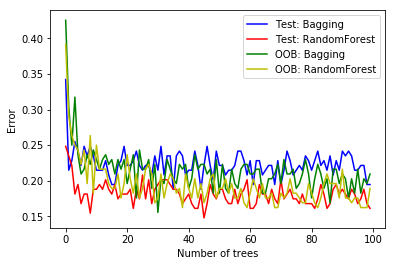

In [12]:
plt.plot(errorbc, c='b', label='Test: Bagging')
plt.plot(errorrfc, c='r', label='Test: RandomForest')
plt.plot(oob_er_bc, c='g', label='OOB: Bagging')
plt.plot(oob_er_rfc, c='y', label='OOB: RandomForest')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()

In [18]:
data2 = pd.read_csv('OJ.csv')
for column in data2.columns:
    if data2[column].dtype == type(object):
        le = LabelEncoder()
        data2[column] = le.fit_transform(data2[column])
purchase=data2[['Purchase']].values.reshape(-1,1)
x2=data2[[ 'WeekofPurchase',  'StoreID',  'PriceCH',  'PriceMM',  'DiscCH', 'DiscMM', 'SpecialCH',  'SpecialMM',   'LoyalCH',  'SalePriceMM',  'SalePriceCH', 'PriceDiff', 'PctDiscMM',  'PctDiscCH',  'ListPriceDiff',  'STORE']]
purchase=purchase.ravel()

In [19]:
x2_train, x2_test, purchase_train, purchase_test = sklearn.model_selection.train_test_split(x2, purchase, test_size=0.5)
error1 = []
error2 =[]
error3=[]
I=np.linspace(1,500,100).astype(int)
for i in I:
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(x2_train, purchase_train)
    purchase_predict = rfc.predict(x2_test)
    test1 = (purchase_test == purchase_predict)
    error1.append(len(test1[test1==False])/len(purchase_test))
    
    rfc2 = RandomForestClassifier(n_estimators = i, max_features=None)
    rfc2.fit(x2_train, purchase_train)
    purchase_predict2 = rfc2.predict(x2_test)
    test2 = (purchase_test == purchase_predict2)
    error2.append(len(test2[test2==False])/len(purchase_test))
    
    rfc3 = RandomForestClassifier(n_estimators = i, max_features=0.5)
    rfc3.fit(x2_train, purchase_train)
    purchase_predict3 = rfc3.predict(x2_test)
    test3 = (purchase_test == purchase_predict3)
    error3.append(len(test3[test3==False])/len(purchase_test))
    

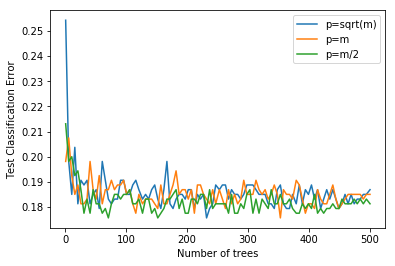

In [20]:
plt.plot(I,error1, label='p=sqrt(m)')
plt.plot(I,error2, label='p=m')
plt.plot(I,error3, label='p=m/2')
plt.xlabel('Number of trees')
plt.ylabel('Test Classification Error')
plt.legend()

Parte 2:
Utilice el data set XX para encontrar cual de los siguientes modelos logra predecir mejor el target YY:

-Logistic regresion.
-Linear discriminant analysis.
-Classification Tree.
-Random Forest. Haga explicito el criterio que utiliza para comparar los modelos.

In [23]:
x2_train, x2_validation, purchase_train, purchase_validation = sklearn.model_selection.train_test_split(x2, purchase, test_size=0.5)

In [28]:
logistic=sklearn.linear_model.LogisticRegression()
logistic.fit(x2_train, purchase_train)
prob_log=logistic.predict_proba(x2_validation)
prob_log=prob_log[:,1]

In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(x2_train, purchase_train)
pred=lda.predict(x2_validation)
prob_lda=lda.predict_proba(x2_validation)
prob_lda=prob_lda[:,1]

C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [31]:
def prec_recall_roc(probab, tam, validation):
    prec=np.zeros(50)
    recall=np.zeros(50)
    tp_rate=np.zeros(50)
    fp_rate=np.zeros(50)
    

    for j in range(0,50):
        th=j/50
        predict=np.zeros(tam)
        predict[probab>=th]=1
        predict[probab<th]=0

        tp_test=0.0
        fp_test=0.0
        fn_test=0.0
        tn_test=0.0

        for i in range(0, tam):
            if((predict[i]==1.0) & (validation[i]==1.0)):
                tp_test+=1
            elif((predict[i]==1.0) & (validation[i]==0.0)):
                fp_test+=1
            elif((predict[i]==0.0) & (validation[i]==1.0)):
                fn_test+=1
            elif((predict[i]==0.0) & (validation[i]==0.0)):
                tn_test+=1

        if((tp_test+fp_test)==0):
            prec[j]=0
        else:
            prec[j]=tp_test/(tp_test+fp_test)
        recall[j]=tp_test/(tp_test+fn_test)
        tp_rate[j]=tp_test/(tp_test+fn_test)
        fp_rate[j]=fp_test/(tn_test+fp_test)
        
        
    return prec, recall, tp_rate, fp_rate

In [35]:
import scipy.integrate

prec_log, recall_log, tp_rate_log, fp_rate_log= prec_recall_roc(prob_log, purchase_validation.size, purchase_validation)
prec_lda, recall_lda, tp_rate_lda, fp_rate_lda=prec_recall_roc(prob_lda, purchase_validation.size, purchase_validation)

area_pr_log = scipy.integrate.trapz(prec_log, recall_log)
area_roc_log = scipy.integrate.trapz(tp_rate_log, fp_rate_log)

area_pr_lda = scipy.integrate.trapz(prec_lda, recall_lda)
area_roc_lda = scipy.integrate.trapz(tp_rate_lda, fp_rate_lda)

Text(0,0.5,'TP rate')

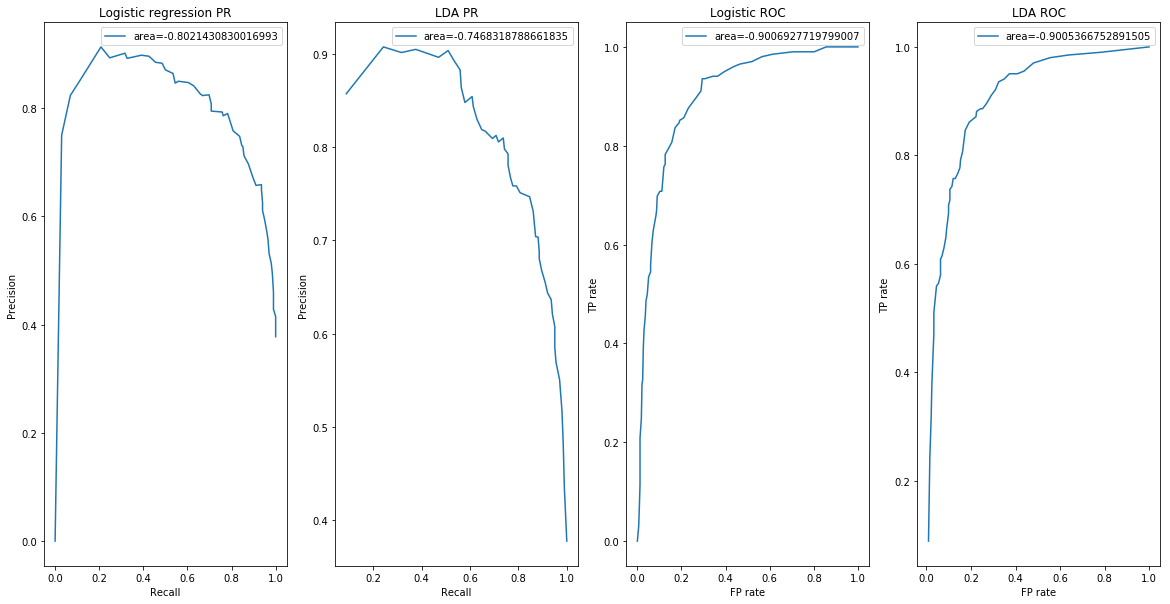

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.plot(recall_log, prec_log, label='area='+str(area_pr_log))
plt.legend()
plt.title('Logistic regression PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.subplot(1,4,2)
plt.plot(recall_lda, prec_lda, label='area='+str(area_pr_lda))
plt.legend()
plt.title('LDA PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.subplot(1,4,3)
plt.plot(fp_rate_log, tp_rate_log, label='area='+str(area_roc_log))
plt.legend()
plt.title('Logistic ROC')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.subplot(1,4,4)
plt.plot(fp_rate_lda, tp_rate_lda, label='area='+str(area_roc_lda))
plt.legend()
plt.title('LDA ROC')
plt.xlabel('FP rate')
plt.ylabel('TP rate')


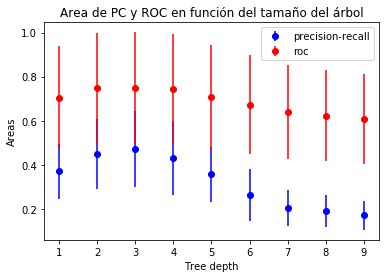

In [42]:
max_d=10
it=np.zeros(max_d-1)
f_scores=np.zeros(max_d-1)
areas_pr=np.zeros(max_d-1)
areas_roc=np.zeros(max_d-1)
std_pr=np.zeros(max_d-1)
std_roc=np.zeros(max_d-1)

x_train, x_test, purchase_train, purchase_test = sklearn.model_selection.train_test_split(x2, purchase, test_size=0.5)

for i in range(1,max_d):
    area_pr=np.zeros(10)
    area_roc=np.zeros(10)
    for j in range(0,9):
        x_subtrain, x_validation, purchase_subtrain, purchase_validation = sklearn.model_selection.train_test_split(x_train, purchase_train, test_size=0.5)
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(x_subtrain, purchase_subtrain)
        probs=clf.predict_proba(x_test)
        prob_purchase=probs[:,1]

        prec, recall, tp_rate, fp_rate= prec_recall_roc(prob_purchase, purchase_test.size, purchase_test)
        area_pr[j] = scipy.integrate.trapz(prec, recall)
        area_roc[j] = scipy.integrate.trapz(tp_rate, fp_rate)
    areas_pr[i-1]=np.mean(area_pr)
    areas_roc[i-1]=np.mean(area_roc)
    std_pr[i-1]=np.std(area_pr)
    std_roc[i-1]=np.std(area_roc)
    it[i-1]=i

plt.figure()
plt.errorbar(it, -areas_pr, yerr=std_pr, fmt='o', c='b', label='precision-recall')
plt.errorbar(it, -areas_roc, yerr=std_roc, fmt='o', c='r', label='roc')
plt.title('Area de PC y ROC en función del tamaño del árbol')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Areas')
plt.show()

Notar que el tamaño de árbol óptimo es 3. TOmamos el área correspondiente a dicho tamaño. Ahora encontraremos el randomforest óptimo.

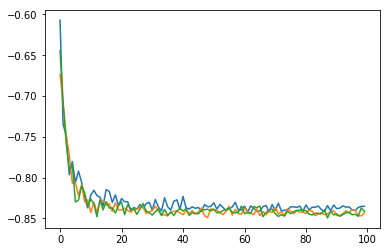

In [48]:
x2_train, x2_test, purchase_train, purchase_test = sklearn.model_selection.train_test_split(x2, purchase, test_size=0.5)
max_d=100
it=np.zeros(max_d)
f_scores=np.zeros(max_d)
areas1=np.zeros(max_d)
areas2=np.zeros(max_d)
areas3=np.zeros(max_d)

I=np.linspace(1,100,100).astype(int)
for i in I:
    rfc1 = RandomForestClassifier(n_estimators = i)
    rfc1.fit(x2_train, purchase_train)
    prob_rand1 = rfc1.predict_proba(x2_test)
    prob_rand1=prob_rand1[:,1]
    prec1, recall1, tp_rate1, fp_rate1= prec_recall_roc(prob_rand1, purchase_test.size, purchase_test)
    areas1[i-1] = scipy.integrate.trapz(prec1, recall1)
    areas1[i-1] = scipy.integrate.trapz(tp_rate1, fp_rate1)
    
    rfc2 = RandomForestClassifier(n_estimators = i, max_features=None)
    rfc2.fit(x2_train, purchase_train)
    prob_rand2 = rfc2.predict_proba(x2_test)
    prob_rand2=prob_rand2[:,1]
    prec2, recall2, tp_rate2, fp_rate2= prec_recall_roc(prob_rand2, purchase_test.size, purchase_test)
    areas2[i-1] = scipy.integrate.trapz(prec2, recall2)
    areas2[i-1] = scipy.integrate.trapz(tp_rate2, fp_rate2)
    
    rfc3 = RandomForestClassifier(n_estimators = i, max_features=0.5)
    rfc3.fit(x2_train, purchase_train)
    prob_rand3 = rfc3.predict_proba(x2_test)
    prob_rand3=prob_rand3[:,1]
    prec3, recall3, tp_rate3, fp_rate3= prec_recall_roc(prob_rand3, purchase_test.size, purchase_test)
    areas3[i-1] = scipy.integrate.trapz(prec3, recall3)
    areas3[i-1] = scipy.integrate.trapz(tp_rate3, fp_rate3)


Text(0,0.5,'Areas')

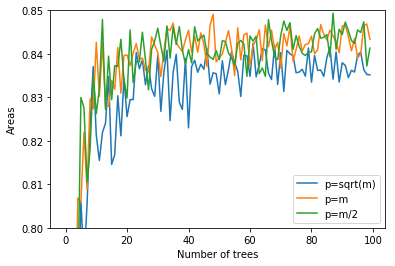

In [53]:
plt.figure()
plt.plot(-areas1, label='p=sqrt(m)')
plt.plot(-areas2, label='p=m')
plt.plot(-areas3, label='p=m/2')
plt.legend()
plt.ylim(0.8,0.85)
plt.xlabel('Number of trees')
plt.ylabel('Areas')

Notar que el p +optimo es el verde con un área máximo en cerca de 90 árboles.
Falta comparar las áreas para saber cuál es mayor pero se tienen todas.